<a href="https://colab.research.google.com/github/Small-Fiend/ml-for-sec-lab1/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML for Security. Лабораторная №1

Выполнила: Рудинская Е.А., группа 6132-010402D


In [8]:
import numpy as np
import pandas as pd
import joblib
from joblib import dump,load

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from PIL import Image
from google.colab import files
from io import BytesIO

In [9]:
uploaded = files.upload()


Saving classes_train.csv to classes_train.csv
Saving features_train.csv to features_train.csv


In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [169]:
#Получение данных
features = pd.read_csv('features_train.csv')
classes = pd.read_csv('classes_train.csv')

In [170]:
# Последним столбцом добавляем метки классов, удаляем бинарные признаки
df1 = features.copy()
df1['is_bot'] = pd.Series(classes['is_bot'], index = df1.index)

df1.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [171]:
# Проверяем пропущенные значения
df1.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

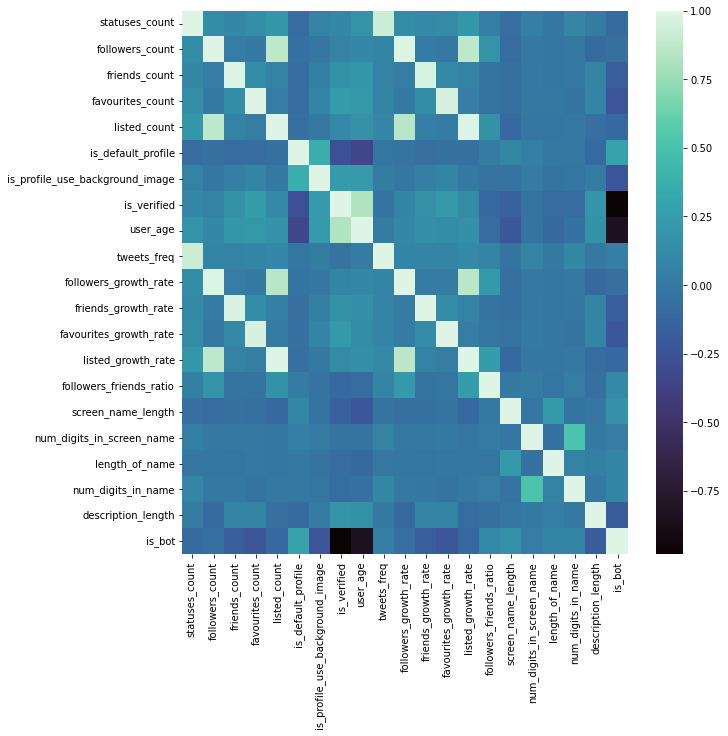

In [172]:
# Корреляционная матрица признаков

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), cmap = "mako")

In [173]:
# Разделение набора данных на независимые и зависимые переменные. Сохраняем как массив
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [174]:
# Деление на обучающую и тестовую выборки (1:3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 26)

In [175]:
X_train.shape, X_test.shape

((1800, 20), (600, 20))

In [176]:
len(Y_train), len(Y_test)

(1800, 600)

## 1.1 Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры

**F-мера (average =**

* binary - результаты только для класса, указанного параметром pos_label
* micro - глобально, подсчитывая общее количество истинных срабатываний, ложноотрицательных и ложноположительных результатов
* macro - для каждой метки, находит их невзвешенное среднее значение
* weighted - для каждой метки, находит их взвешенное среднее значение )

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [178]:
# Для сравнения значений F-меры
F_measure = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             'DecisionTreeClassifier':0}
#             'RandomForestClassifier':0 }

Метод LogisticRegression

In [179]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [180]:
# Обучаем

model_Log = LogisticRegression()
    
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

F_measure['LogisticRegression'] = f1_score(Y_test, Y_Log, average = "weighted")

Метод K-соседей

In [181]:
# Стандартизируем данные

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [182]:
# Обучаем

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

F_measure['KNeighborsClassifier'] = f1_score(Y_test, Y_KNN, average = "weighted")

Метод RandomForestClassifier

In [183]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [184]:
# Обучаем

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

F_measure['RandomForestClassifier'] = f1_score(Y_test, Y_RFC, average = "weighted")

In [185]:
maxim = 0

for i, j in F_measure.items():

    if j > maxim:
        maxim = j
        model_max = i
print ('Наибольшее значение F-меры:', maxim, '.  Модель:', model_max)

Наибольшее значение F-меры: 0.9966666666666667 .  Модель: RandomForestClassifier


In [235]:
# сохраняем лучшую модель
joblib.dump(model_Log, 'model_Log.pkl')
files.download('model_Log.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

2.1.1 Отбор наиболее информативных признаков для различных моделей при помощи графика с важностью коэфициентов

In [187]:
# Функция для вывода графика с важностью коэфициентов при соответствующих признаках

def barh_plot(model, X_data):
    attribute = X_data.columns.values
    
    # значение важности оцениваем по модулю
    importance = abs(model.coef_)
   
    list1 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    list2 = list1.sort_values(by='importance', ascending=False)
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')
    
    return list2

Модель LinearRegression

In [188]:
# нормировка данных 

scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

    importance                        attribute
7     0.392850                      is_verified
4     0.056180                     listed_count
13    0.055517               listed_growth_rate
8     0.042502                         user_age
12    0.029924           favourites_growth_rate
3     0.027785                 favourites_count
11    0.022489              friends_growth_rate
2     0.021800                    friends_count
1     0.019212                  followers_count
10    0.018382            followers_growth_rate
16    0.005894        num_digits_in_screen_name
5     0.004785               is_default_profile
9     0.004491                      tweets_freq
6     0.002752  is_profile_use_background_image
14    0.002687          followers_friends_ratio
15    0.001685               screen_name_length
17    0.000669                   length_of_name
19    0.000593               description_length
0     0.000176                   statuses_count
18    0.000084               num_digits_

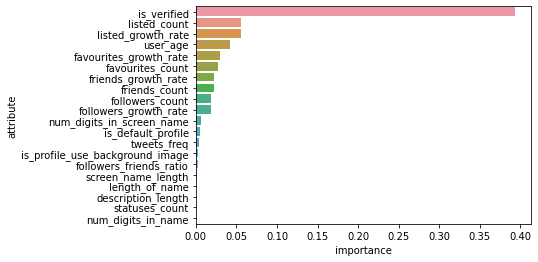

In [189]:
model_regress = LinearRegression()
model_regress.fit(X_train_M, Y_train)
pred_train = model_regress.predict(X_train_M)
pred_test = model_regress.predict(X_test_M)

list_log = barh_plot(model_regress, X_train)

    importance                        attribute
7     0.392835                      is_verified
4     0.055450                     listed_count
13    0.054806               listed_growth_rate
8     0.042510                         user_age
12    0.029955           favourites_growth_rate
3     0.027809                 favourites_count
11    0.022510              friends_growth_rate
2     0.021820                    friends_count
1     0.018601                  followers_count
10    0.017797            followers_growth_rate
16    0.005893        num_digits_in_screen_name
5     0.004787               is_default_profile
9     0.004481                      tweets_freq
6     0.002754  is_profile_use_background_image
14    0.002647          followers_friends_ratio
15    0.001686               screen_name_length
17    0.000668                   length_of_name
19    0.000596               description_length
0     0.000188                   statuses_count
18    0.000084               num_digits_

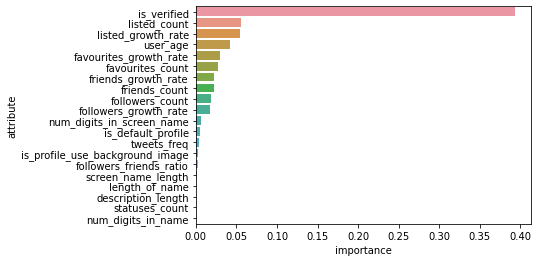

In [190]:
#Модель Ridge
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train_M, Y_train)
pred_ridge_train = model_ridge.predict(X_train_M)
pred_ridge_test = model_ridge.predict(X_test_M)

list_rige = barh_plot(model_ridge, X_train)

2.1.2 Отбор наиболее информативных признаков при помощи SelectKBest и Extra Tree Classifier

In [191]:
list_log['attribute'].loc[:10]
list_rige['attribute'].loc[:10]

7                is_verified
4               listed_count
13        listed_growth_rate
8                   user_age
12    favourites_growth_rate
3           favourites_count
11       friends_growth_rate
2              friends_count
1            followers_count
10     followers_growth_rate
Name: attribute, dtype: object

In [192]:
from sklearn import preprocessing

In [193]:
K = 10
# При помощи SelectKBest. DataFrame с признаками и их информативностью, отсортированный по убыванию

best_features1 = SelectKBest(score_func=chi2, k=K)
fit = best_features1.fit(X.values, Y.values)

best_features1 = pd.DataFrame(data=fit.scores_, index = X.columns, columns=['chi2_score'])
best_features1['number'] = pd.Series(range(X.shape[1]), index = best_features1.index)

sel_best = best_features1.nlargest(K, 'chi2_score')
sel_best

,chi2_score,number
followers_count,6.568911e+07,1
followers_friends_ratio,9.749806e+06,14
favourites_count,8.109731e+06,3
statuses_count,2.747301e+06,0
friends_count,1.388549e+06,2
user_age,7.447282e+05,8
listed_count,4.817762e+05,4
followers_growth_rate,1.412058e+04,10
favourites_growth_rate,2.046060e+03,12
description_length,1.438377e+03,19


In [194]:
# При помощи ExtraTreesClassifier. DataFrame с признаками и их информативностью, отсортированный по убыванию
model2 = ExtraTreesClassifier()
model2 = model2.fit(X.values, Y.values.ravel())

best_features2 = pd.DataFrame(data = model2.feature_importances_, index = X.columns, columns=['feature_importance'])
best_features2['number'] = pd.Series(range(X.shape[1]), index = best_features2.index)

ex_trees = best_features2.nlargest(K, 'feature_importance')
ex_trees

,feature_importance,number
is_verified,0.634513,7
user_age,0.199541,8
is_default_profile,0.033537,5
is_profile_use_background_image,0.027285,6
favourites_count,0.015471,3
followers_friends_ratio,0.013739,14
friends_growth_rate,0.012701,11
favourites_growth_rate,0.012044,12
friends_count,0.011037,2
listed_count,0.008046,4


Признаки, которые хорошо себя показали во всех трех случаях:

* is_verified
* user_age
* listed_count
* friends_growth_rate
* favourites_count
* followers_growth_rate
* is_default_profile
* is_profile_use_background_image
* statuses_count
* friends_count

In [195]:
# Удаление 10 наименее значимых

df_best = df1.drop(columns = ['followers_count', 
                           'tweets_freq', 
                            'favourites_growth_rate', 
                            'listed_growth_rate',
                            'followers_friends_ratio', 
                            'screen_name_length',
                            'num_digits_in_screen_name', 
                            'length_of_name', 
                            'num_digits_in_name',
                            'description_length'])

df_best.head()

,statuses_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,followers_growth_rate,friends_growth_rate,is_bot
0,5124,3074,13768,126,0,0,1,2711,2.449650,1.133899,0
1,10672,1575,4561,191,0,1,1,4424,1.913427,0.356013,0
2,704,454,2400,77,0,0,0,1358,2.288660,0.334315,0
3,6091,526,599,1515,0,1,1,4214,72.265781,0.124822,0
4,12967,204,1177,452,0,1,1,3200,4.279063,0.063750,0


 Корреляционная матрица признаков

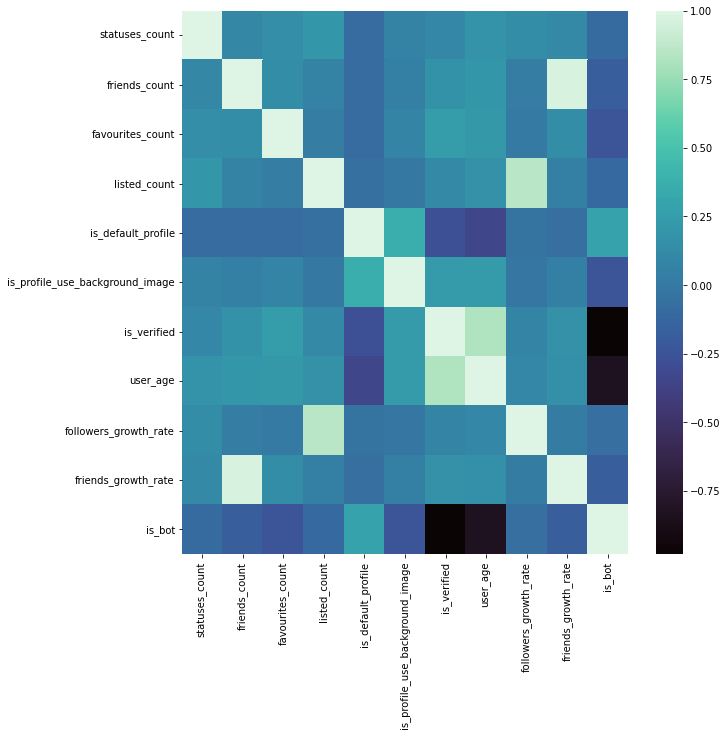

In [196]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_best.corr(), cmap = "mako")

Подбор модели

In [197]:
from sklearn.naive_bayes import MultinomialNB

In [198]:
X = df_best.drop('is_bot', axis = 1)
Y = df_best.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [199]:
model_NB = MultinomialNB()
model_NB.fit(X_train, Y_train)
Y_NB = model_NB.predict(X_test)

print('F1: ', f1_score(Y_test, Y_NB))
print('accuracy: ', accuracy_score(Y_test, Y_NB))

F1:  0.810958904109589
accuracy:  0.885


In [200]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

print('F1: ', f1_score(Y_test, Y_KNN))
print('accuracy: ', accuracy_score(Y_test, Y_KNN))

F1:  0.9435215946843853
accuracy:  0.9716666666666667


In [201]:
model_MLP = MLPClassifier(alpha=1, max_iter=1000)
model_MLP.fit(X_train, Y_train)
Y_MLP = model_MLP.predict(X_test)

print('F1: ', f1_score(Y_test, Y_MLP))
print('accuracy: ', accuracy_score(Y_test, Y_MLP))

F1:  0.9028213166144202
accuracy:  0.9483333333333334


In [202]:
model_LDA = LDA()
model_LDA.fit(X_train, Y_train)
Y_LDA = model_LDA.predict(X_test)

print('F1: ', f1_score(Y_test, Y_LDA))
print('accuracy: ', accuracy_score(Y_test, Y_LDA))

F1:  0.9902912621359222
accuracy:  0.995


In [203]:
# Обучаем на полном наборе лучшую модель

X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

model_LDA = LDA()
model_LDA.fit(X_train, Y_train)
Y_LDA = model_LDA.predict(X_test)

print('F1: ', f1_score(Y_test, Y_LDA))
print('accuracy: ', accuracy_score(Y_test, Y_LDA))

F1:  0.9902912621359222
accuracy:  0.995


In [234]:
# сохраняем
joblib.dump(model_LDA, 'model_LDA.pkl')
files.download('model_LDA.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.2. Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

Метрики:

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

Можно через матрицу ошибок:

> TP (true positive, истинно положительные, объект верно отнесён к данному классу) - сумма диагональных элементов

> FP (false positive, ложно положительные, объект неверно отнесён к данному классу) - это сумма соответствующего столбца, за вычетом диагонального элемента

> TN (true negative, истинно отрицательные, верно определено, что объект не принадлежит к данному классу) - удалить соответствующие столбец и строку из матрицы, а затем суммировать все остальные элементы

> FN (false negative, ложно отрицательные, неверно определено, что объект не принадлежит к данному классу) - сумму соответствующей строки, за вычетом диагонального элемента

Ложное обнаружение - ошибка 1 рода (Type I Error) - объект ошибочно относится к положительному классу ( = FP / количество в тестовой выборке).

Пропуск бота - ошибка 2 рода (Type II Error) - объект ошибочно относится к отрицательному классу ( = FN / количество в тестовой выборке).

In [205]:
# для сравнения ошибок первого и второго рода
Error_I = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             #'DecisionTreeClassifier':0,
             'RandomForestClassifier':0 }


Error_II = {'LogisticRegression':0, 
             'KNeighborsClassifier':0, 
             #'DecisionTreeClassifier':0}
             'RandomForestClassifier':0 }

In [206]:
# Работаем с полным набором признаков
X = df1.drop('is_bot', axis = 1)
Y = df1.is_bot

In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 21)

In [208]:
# количество в тестовой выборке
M = Y_test.shape[0]

In [209]:
# расчет метрик по матрице ошибок

def Metrics (conf_mat):
    Metrics_list = []
    num_classes = 2
    
    FP_val = []
    for i in range(num_classes):    
        FP_val.append(sum(conf_mat[:,i]) - conf_mat[i,i])
    FP = sum(FP_val)
    
    FN_val = []
    for i in range(num_classes):
        FN_val.append(sum(conf_mat[i,:]) - conf_mat[i,i])
    FN = (sum(FN_val))
    
    Metrics_list.append(FP)
    Metrics_list.append(FN)

    return Metrics_list

Логистическая регрессия

In [210]:
# Стандартизируем данные

Log = LogisticRegression()
scaler = StandardScaler()
X_train_M = scaler.fit_transform(X_train)
X_test_M = scaler.transform(X_test)

In [211]:
# обучение

model_Log = LogisticRegression() 
model_Log.fit(X_train_M, Y_train)
Y_Log = model_Log.predict(X_test_M)

In [212]:
conf_mat_Log = confusion_matrix(Y_test, Y_Log)
Error_I['LogisticRegression'] = Metrics (conf_mat_Log)[0] / M
Error_II['LogisticRegression'] = Metrics (conf_mat_Log)[1] / M

K-соседей

In [213]:
# Стандартизируем данные

KNN = KNeighborsClassifier()
scaler = StandardScaler()

steps_KNN = [('normalizer', scaler), ('KNN', KNN)]
pipe_KNN = Pipeline(steps_KNN)

In [214]:
# С помощью GridSearchCV производим подбор гиперпараметров:
# n_neighbors - это количество соседей, которые нужно использовать, 
# weights - весовая функция,используемая при прогнозировании
# algorithm - алгоритм, используемый для вычисления ближайших соседей


params_KNN = \
     {'KNN__n_neighbors': np.arange(5, 50), 
     'KNN__weights': ['uniform', 'distance'], 
     'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNN = GridSearchCV(pipe_KNN, params_KNN)
grid_search_KNN.fit(X_train, Y_train)

grid_search_KNN.best_params_

{'KNN__algorithm': 'auto', 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}

In [215]:
# Обучаем модель с лучшими параметрами

model_KNN = KNeighborsClassifier(algorithm = grid_search_KNN.best_params_['KNN__algorithm'], 
                                 n_neighbors = grid_search_KNN.best_params_['KNN__n_neighbors'], 
                                 weights = grid_search_KNN.best_params_['KNN__weights'])
model_KNN.fit(X_train, Y_train)
Y_KNN = model_KNN.predict(X_test)

In [216]:
conf_mat_KNN = confusion_matrix(Y_test, Y_KNN)
Error_I['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[0] / M
Error_II['KNeighborsClassifier'] = Metrics (conf_mat_KNN)[1] / M

Случайный лес

In [217]:
# Стандартизируем данные

RFC = RandomForestClassifier()
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

In [218]:
#Подбираем гиперпараметры

params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy']}
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)
grid_search_RFC.fit(X_train, Y_train)
grid_search_RFC.best_params_

{'RFC__criterion': 'entropy', 'RFC__n_estimators': 44}

In [219]:
# Обучаем модель с лучшими параметрами

model_RFC = RandomForestClassifier(n_estimators = grid_search_RFC.best_params_['RFC__n_estimators'], 
                                 criterion = grid_search_RFC.best_params_['RFC__criterion'])
model_RFC.fit(X_train, Y_train)
Y_RFC = model_RFC.predict(X_test)

In [220]:
conf_mat_RFC = confusion_matrix(Y_test, Y_RFC)
Error_I['RandomForestClassifier'] = Metrics (conf_mat_RFC)[0] / M
Error_II['RandomForestClassifier'] = Metrics (conf_mat_RFC)[1] / M

Сравниваем значения ошибок первого и второго рода у различных моделей

In [221]:
Error_II

{'LogisticRegression': 0.0033333333333333335,
 'KNeighborsClassifier': 0.015,
 'RandomForestClassifier': 0.0033333333333333335}

Ошибка II рода ни в одном случае не превышает 0,03 

In [222]:
minim = 1

for i, j in Error_I.items():
    if j < minim:
        minim = j
        model_min = i
print ('Наименьшая ошибка первого рода:', minim, '.  Модель:', model_min)

Наименьшая ошибка первого рода: 0.0033333333333333335 .  Модель: LogisticRegression


In [223]:
report_RFC = classification_report(Y_test, Y_RFC)
print(report_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       447
           1       1.00      0.99      0.99       153

    accuracy                           1.00       600
   macro avg       1.00      0.99      1.00       600
weighted avg       1.00      1.00      1.00       600



Вывод:

Наименьшую ошибку первого рода дает модель RandomForestClassifier и LogisticRegression

Ошибка второго рода не превышает 0,03 у всех четырех моделей. Но наименьшая у RandomForestClassifier и LogisticRegression

In [224]:
# сохраняем "лучшие" модели 
joblib.dump(model_RFC, 'model_RFC.pkl')
files.download('model_RFC.pkl') 

['model_RFC.pkl']

In [225]:
# сохраняем "лучшие" модели 
joblib.dump(model_Log, 'model_Log.pkl')
files.download('model_Log.pkl') 

['model_Log.pkl']